# Appendix
---

In [1]:
import os
from datetime import datetime
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
from qulacs import DensityMatrix, Observable, QuantumCircuit, QuantumState
from qulacs.gate import CZ, RX, RY, RZ, Identity, Y, merge
from qulacsvis import circuit_drawer
from scipy.optimize import minimize

import pennylane as qml

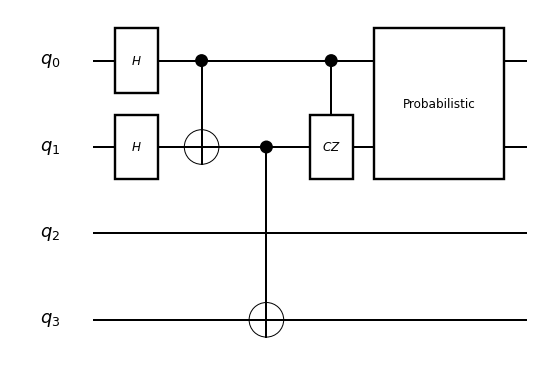

In [2]:
nqubit: int = 4
noise_prob: float = 0.001
state = DensityMatrix(nqubit)
circuit = QuantumCircuit(nqubit)
circuit.add_H_gate(0)
circuit.add_H_gate(1)
circuit.add_CNOT_gate(0, 1)
circuit.add_CNOT_gate(1, 3)
circuit.add_noise_gate(CZ(0, 1), "Depolarizing", noise_prob)
circuit_drawer(circuit, "mpl")

In [3]:
print(state)

 *** Density Matrix ***
 * Qubit Count : 4
 * Dimension   : 16
 * Density matrix : 
(1,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0)
(0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0) (0,0

In [4]:
circuit.update_quantum_state(state)
print(state)

 *** Density Matrix ***
 * Qubit Count : 4
 * Dimension   : 16
 * Density matrix : 
   (0.249867,0)    (0.249733,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)    (0.249733,0)   (-0.249733,0)           (0,0)           (0,0)           (0,0)           (0,0)
   (0.249733,0)    (0.249867,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)    (0.249733,0)   (-0.249733,0)           (0,0)           (0,0)           (0,0)           (0,0)
          (0,0)           (0,0) (0.000133333,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)
          (0,0)           (0,0)           (0,0) (0.000133333,0)           (0,0)           (0,0)           (0,0)           (0,0)           (0,0)     

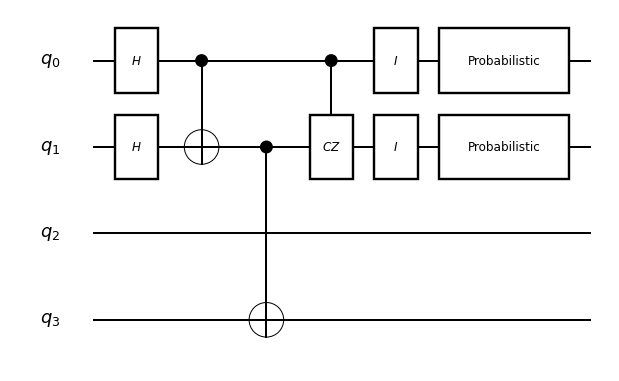

In [5]:
state2 = DensityMatrix(nqubit)
circuit2 = QuantumCircuit(nqubit)
circuit2.add_H_gate(0)
circuit2.add_H_gate(1)
circuit2.add_CNOT_gate(0, 1)
circuit2.add_CNOT_gate(1, 3)
circuit2.add_CZ_gate(0, 1)
circuit2.add_noise_gate(Identity(0), "Depolarizing", noise_prob)
circuit2.add_noise_gate(Identity(1), "Depolarizing", noise_prob)
circuit_drawer(circuit2, "mpl")

In [6]:
circuit2.update_quantum_state(state2)
print(state2)

 *** Density Matrix ***
 * Qubit Count : 4
 * Dimension   : 16
 * Density matrix : 
    (0.249833,0)       (0.2495,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)     (0.249334,0)    (-0.249334,0)            (0,0)            (0,0)            (0,0)            (0,0)
      (0.2495,0)     (0.249833,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)     (0.249334,0)    (-0.249334,0)            (0,0)            (0,0)            (0,0)            (0,0)
           (0,0)            (0,0)  (0.000166667,0)  (0.000166444,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)            (0,0)
           (0,0)            (0,0)  (0.000166444,0)  (0.000166667,0)            (0,0)            (0,0

In [7]:
type(state)

qulacs_core.DensityMatrix

In [8]:
mat1 = state.get_matrix()
mat2 = state2.get_matrix()

In [9]:
x = np.array([[1, 0], [0, 0]])
qml.math.trace_distance(x, x)

0.0

In [10]:
qml.math.trace_distance(mat1, mat2)

0.0013317777777778548

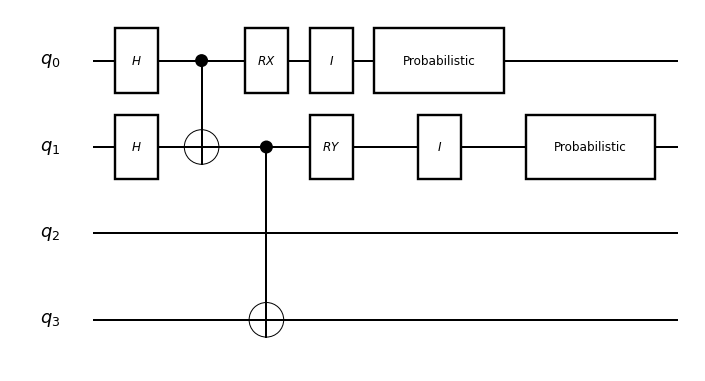

In [11]:
state3 = DensityMatrix(nqubit)
circuit3 = QuantumCircuit(nqubit)
circuit3.add_H_gate(0)
circuit3.add_H_gate(1)
circuit3.add_CNOT_gate(0, 1)
circuit3.add_CNOT_gate(1, 3)
circuit3.add_RX_gate(0, 0.1)
circuit3.add_noise_gate(Identity(0), "Depolarizing", noise_prob)
circuit3.add_RY_gate(1, 0.2)
circuit3.add_noise_gate(Identity(1), "Depolarizing", noise_prob)
circuit_drawer(circuit3, "mpl")

In [12]:
circuit3.update_quantum_state(state3)
print(state3)

 *** Density Matrix ***
 * Qubit Count : 4
 * Dimension   : 16
 * Density matrix : 
   (0.247345,0)    (0.247015,0)  (-0.0248006,0)  (-0.0247675,0)           (0,0)           (0,0)           (0,0)           (0,0)   (0.0248006,0)   (0.0247675,0)    (0.247178,0)    (0.246849,0)           (0,0)           (0,0)           (0,0)           (0,0)
   (0.247015,0)    (0.247345,0)  (-0.0247675,0)  (-0.0248006,0)           (0,0)           (0,0)           (0,0)           (0,0)   (0.0247675,0)   (0.0248006,0)    (0.246849,0)    (0.247178,0)           (0,0)           (0,0)           (0,0)           (0,0)
 (-0.0248006,0)  (-0.0247675,0)  (0.00265502,0)  (0.00265148,0)           (0,0)           (0,0)           (0,0)           (0,0) (-0.00248836,0) (-0.00248504,0)  (-0.0248006,0)  (-0.0247675,0)           (0,0)           (0,0)           (0,0)           (0,0)
 (-0.0247675,0)  (-0.0248006,0)  (0.00265148,0)  (0.00265502,0)           (0,0)           (0,0)           (0,0)           (0,0) (-0.00248504,0) (-0.

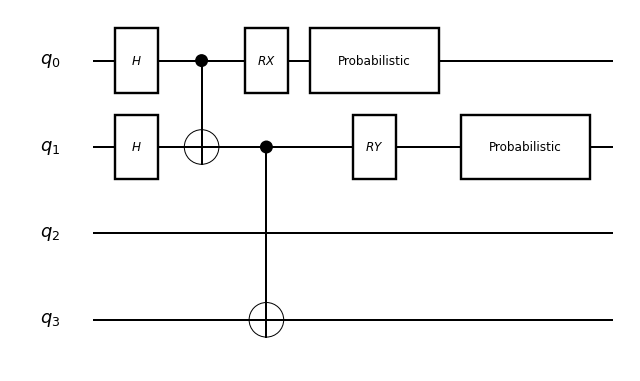

In [13]:
state4 = DensityMatrix(nqubit)
circuit4 = QuantumCircuit(nqubit)
circuit4.add_H_gate(0)
circuit4.add_H_gate(1)
circuit4.add_CNOT_gate(0, 1)
circuit4.add_CNOT_gate(1, 3)
circuit4.add_noise_gate(RX(0, 0.1), "Depolarizing", noise_prob)
circuit4.add_noise_gate(RY(1, 0.2), "Depolarizing", noise_prob)
circuit_drawer(circuit4, "mpl")

In [14]:
circuit3.update_quantum_state(state4)
print(state4)

 *** Density Matrix ***
 * Qubit Count : 4
 * Dimension   : 16
 * Density matrix : 
   (0.247345,0)    (0.247015,0)  (-0.0248006,0)  (-0.0247675,0)           (0,0)           (0,0)           (0,0)           (0,0)   (0.0248006,0)   (0.0247675,0)    (0.247178,0)    (0.246849,0)           (0,0)           (0,0)           (0,0)           (0,0)
   (0.247015,0)    (0.247345,0)  (-0.0247675,0)  (-0.0248006,0)           (0,0)           (0,0)           (0,0)           (0,0)   (0.0247675,0)   (0.0248006,0)    (0.246849,0)    (0.247178,0)           (0,0)           (0,0)           (0,0)           (0,0)
 (-0.0248006,0)  (-0.0247675,0)  (0.00265502,0)  (0.00265148,0)           (0,0)           (0,0)           (0,0)           (0,0) (-0.00248836,0) (-0.00248504,0)  (-0.0248006,0)  (-0.0247675,0)           (0,0)           (0,0)           (0,0)           (0,0)
 (-0.0247675,0)  (-0.0248006,0)  (0.00265148,0)  (0.00265502,0)           (0,0)           (0,0)           (0,0)           (0,0) (-0.00248504,0) (-0.

In [15]:
mat3 = state3.get_matrix()
mat4 = state4.get_matrix()
qml.math.trace_distance(mat3, mat4)

0.0